<a href="https://colab.research.google.com/github/sophie-myk/AIFFEL_quest_cr/blob/main/MainQuest/Quest02/Pokemon_legend.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 개요



*   목적: [캐글]의 포켓몬 데이터에서 전설의 포켓몬 구별하기!

*   목표: 탐색적 데이터 분석(Exploratory Data Analysis, EDA)를 통해 머신러닝모델 만들기 학습하기.




#목차



1. 포켓몬 데이터셋 만들기
2. 데이터 전처리/
3. 모델 준비/
4. 모델 학습/
5. 모델 평가/
6. 모델 배포






# 주석 및 의견

In [20]:
#https://www.kaggle.com/datasets/abcsds/pokemon
#Kaggle에서 데이터셋을 다운로드한 후 업로드
from google.colab import files
uploaded = files.upload()

Saving Pokemon.csv to Pokemon (1).csv


In [38]:
print(df.columns)

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')


In [31]:
# 의미 없는 컬럼인 #와 문자열 데이터인 Name, Type 1, Type 2 데이터는 제외하고 사용
#Target 데이터인 Legendary 또한 당연히 빼주기
features = ['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation']

In [40]:
#target 데이터인 Legendary를 변수에 저장
target = 'Legendary'

In [41]:
# Q. 'original_data'에서 'features' 컬럼에 해당하는 데이터를 변수 'X'에 저장합니다.
X = df[features]
print(X.shape)
X.head()

(414, 8)


,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
0,318,45,49,49,65,65,45,1
1,405,60,62,63,80,80,60,1
2,525,80,82,83,100,100,80,1
3,625,80,100,123,122,120,80,1
6,534,78,84,78,109,85,100,1


결측치 개수 확인:
#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64
전설의 포켓몬 데이터 개수: (65, 13)
비전설의 포켓몬 데이터 개수: (735, 13)
     #                 Name    Type 1    Type 2  Total   HP  Attack  Defense  \
0  144             Articuno       Ice    Flying    580   90      85      100   
1  145               Zapdos  Electric    Flying    580   90      90       85   
2  146              Moltres      Fire    Flying    580   90     100       90   
3  150               Mewtwo   Psychic       NaN    680  106     110       90   
4  150  MewtwoMega Mewtwo X   Psychic  Fighting    780  106     190      100   

   Sp. Atk  Sp. Def  Speed  Generation  Legendary  
0       95      125     85           1       True  
1      125       90    100           1       True  
2      125       85     90           1       True  
3

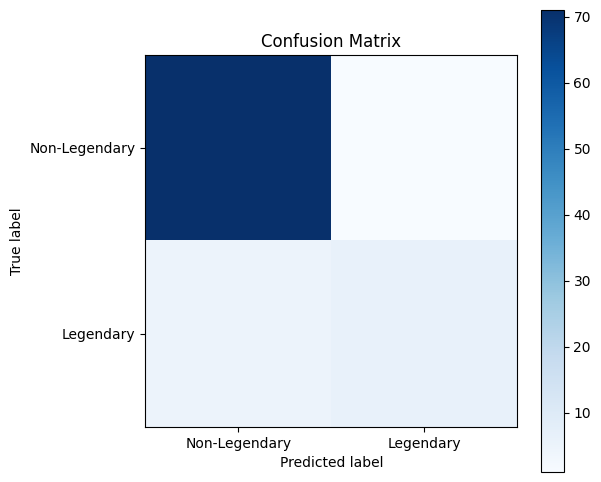

Accuracy: 0.9277


In [42]:
# 필요한 라이브러리 임포트
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 1. 데이터 로드
original_data = pd.read_csv('Pokemon.csv')
pokemon = original_data.copy()  # 원본 데이터를 복사

# 2. 결측치 확인
print("결측치 개수 확인:")
print(pokemon.isnull().sum())  # 각 컬럼의 결측치 개수를 확인

# 3. 전설의 포켓몬과 비전설의 포켓몬을 나누기
legendary = pokemon[pokemon["Legendary"] == True].reset_index(drop=True)
ordinary = pokemon[pokemon["Legendary"] == False].reset_index(drop=True)

print(f"전설의 포켓몬 데이터 개수: {legendary.shape}")
print(f"비전설의 포켓몬 데이터 개수: {ordinary.shape}")

# 전설의 포켓몬 데이터 확인
print(legendary.head())

# 비전설의 포켓몬 데이터 확인
print(ordinary.head())

# 4. 전처리 과정
# 결측값이 있는 행은 삭제
pokemon = pokemon.dropna()

# 'Legendary' 컬럼을 목표 변수 y로 설정
y = pokemon['Legendary']

# 특성(features) 컬럼 선택 (전설 여부를 예측하기 위한 특성으로 HP, Attack, Defense, Speed 등 선택)
X = pokemon[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation']]

# 5. 훈련 데이터와 테스트 데이터로 분리 (train_test_split 사용)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

print("훈련 데이터와 테스트 데이터 크기:")
print(X_train.shape, y_train.shape)  # 훈련 데이터 크기
print(X_test.shape, y_test.shape)    # 테스트 데이터 크기

# 6. 특징 스케일링 (특성 값이 서로 다른 범위에 있기 때문에 스케일링)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 7. 모델 학습 (DecisionTreeClassifier 사용)
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# 8. 예측
y_pred = model.predict(X_test)

# 9. 결과 분석
# 분류 성능 보고서 출력
print("Classification Report:\n", classification_report(y_test, y_pred))

# 혼동 행렬 (Confusion Matrix) 출력
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# 혼동 행렬을 시각화
fig, ax = plt.subplots(figsize=(6, 6))
cax = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.set_title('Confusion Matrix')
ax.set_xticks(np.arange(cm.shape[1]))
ax.set_yticks(np.arange(cm.shape[0]))
ax.set_xticklabels(['Non-Legendary', 'Legendary'])
ax.set_yticklabels(['Non-Legendary', 'Legendary'])
plt.xlabel('Predicted label')
plt.ylabel('True label')

# colorbar 추가 (cax를 인자로 전달)
plt.colorbar(cax)

plt.show()

# 10. 모델 학습 결과 출력
print(f"Accuracy: {model.score(X_test, y_test):.4f}")

# 요약

1. 데이터 로드 및 전처리:

pokemon.csv 파일을 로드한 후, pokemon 데이터프레임을 복사하여 원본을 보존.
결측치가 있는 행을 삭제하고, Legendary 컬럼을 목표 변수(y)로 설정.
포켓몬의 특성(HP, Attack, Defense 등)을 이용하여 예측 모델을 학습할 특성(X)으로 설정.

2. 데이터 분할:

train_test_split을 사용하여 데이터를 훈련 데이터(80%)와 테스트 데이터(20%)로 분리.
훈련 데이터와 테스트 데이터의 크기를 출력.

3. 특성 스케일링:

StandardScaler를 사용하여 특성 값이 서로 다른 범위를 같게 만들어 모델 학습에 유리하게 만듦.

4. 모델 학습:

DecisionTreeClassifier를 사용하여 훈련 데이터를 기반으로 분류 모델을 학습.
학습된 모델로 테스트 데이터에 대해 예측을 진행.

5. 모델 평가:

classification_report와 confusion_matrix를 사용하여 모델의 성능을 평가.
혼동 행렬을 시각화하여 예측 결과의 정확도를 확인.

6. 결과 출력:

모델의 정확도(Accuracy)를 출력하여 모델이 테스트 데이터에서 얼마나 잘 예측했는지 평가.
이 과정은 데이터 전처리, 모델 학습, 예측 및 평가라는 기본적인 머신러닝 프로세스를 통해, 전설의 포켓몬을 분류하는 모델을 생성하는 과정.

# 회고

별점 1개가 무색하게 내게는 너무 어려운 과제였다. 잘 따라가는가 싶으면서도 자꾸 오류가 나서, 자꾸만 앞으로 돌아가서 새로 데이터를 작성하게 되는 과제였다.

이번 과제를 통해 실제로 모델을 돌리기에 앞서 전처리를 확실하게 하는 과정이 얼마나 중요한지 깨닫게 된 것 같고 앞으로의 과제가 더 두렵다.

# 참고

Chat-GPT 선생님.